In [ ]:
# chat ref

# https://chatgpt.com/share/68df6be5-a0ec-800b-94bb-4bdd81669a97

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('data/cancer_dataset.csv')

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print("\nDiagnosis Distribution:")
print(df.diagnosis.value_counts())
print("\nDiagnosis %:")
print(df.diagnosis.value_counts() / len(df) * 100)



Diagnosis Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Diagnosis %:
diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64


In [4]:
X = df.drop(['id', 'diagnosis'], axis=1)  # Features
y = df['diagnosis'].values                # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 426
Testing samples: 143


In [5]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

X_train_sc[:5]


array([[-0.7457497 , -0.22189399, -0.76763823, -0.69992463, -0.17745016,
        -0.81484549, -0.77058176, -0.71893141,  0.07367558, -0.466541  ,
        -0.06425072, -0.66743575, -0.10209931, -0.2928749 , -0.18393921,
        -0.82047986, -0.60655685, -0.39565116,  0.31349503, -0.86786588,
        -0.68974201, -0.5598111 , -0.72300997, -0.65425186, -0.59368618,
        -0.9574791 , -0.92705039, -0.75526511, -0.2651798 , -1.06401285],
       [ 1.80931999, -0.47891277,  1.729345  ,  1.86957126, -0.10709539,
         0.08778356,  0.78972614,  1.03029792, -0.88425236, -1.11356312,
         0.68584831, -1.00753553,  0.57126413,  0.72226497, -0.24304256,
        -0.34690919, -0.16081944,  0.1130248 , -0.90647818, -0.77295455,
         1.82866705, -0.4423718 ,  1.71848601,  1.79391492,  1.02046824,
         0.34279303,  0.68324977,  1.45360387, -0.34586005, -0.74583427],
       [-0.65070334, -0.1074038 , -0.67712665, -0.64286166, -0.50763   ,
        -0.64279898, -0.76675263, -0.89100344, -1

In [11]:
np.arange(1, min(21, len(X_train) // 5))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [10]:
param_grid = {
    # 'n_neighbors': np.arange(1, 31),
    'n_neighbors': np.arange(1, min(21, len(X_train) // 5)),

    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    # error_score='raise'  # Instead of suppressing errors, raise them
)


grid_search.fit(X_train_sc, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


c:\Program Files\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [0.95772914 0.95772914 0.95305062 0.95772914 0.96243502 0.96243502
 0.96243502 0.96716826 0.96243502 0.96243502 0.9577565  0.96949384
 0.96243502 0.96243502 0.95540356 0.9671409  0.96243502 0.96478796
 0.95772914 0.96478796 0.96008208 0.96243502 0.95540356 0.96008208
 0.95772914 0.95772914 0.9553762  0.96008208 0.9553762  0.95772914
 0.9553762  0.96008208 0.96008208 0.96008208 0.95067031 0.96008208
 0.95067031 0.95772914 0.94831737 0.95302326        nan 0.95543092
        nan 0.95543092        nan 0.96481532        nan 0.9671409
        nan 0.96478796        nan 0.96481532        nan 0.96010944
        nan 0.96246238        nan 0.96243502        nan 0.96243502
        nan 0.95772914        nan 0.95772914        nan 0.95772914
        nan 0.96243502        nan 0.95772914        nan 0.95772914
        nan 0.95772914        nan 0.95302326       

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': array([ 1, 2... 18, 19, 20]), 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,np.int64(6)


In [12]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", round(grid_search.best_score_ * 100, 2), "%")


Best Parameters: {'metric': 'euclidean', 'n_neighbors': np.int64(6), 'weights': 'distance'}
Best CV Accuracy: 96.95 %


In [13]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_sc)

print("Test Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 95.8 %

Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        90
           M       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143


Confusion Matrix:
 [[89  1]
 [ 5 48]]


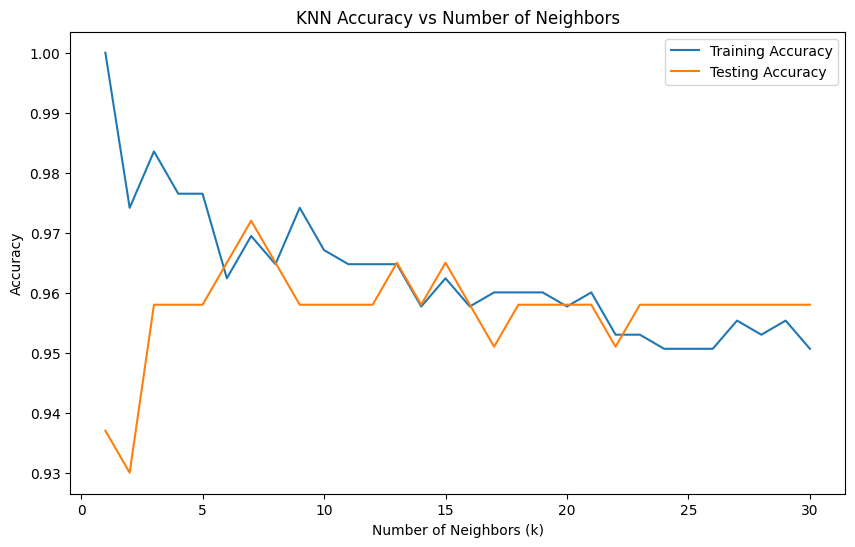

In [14]:
neighbors = np.arange(1, 31)
train_acc = []
test_acc = []

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_sc, y_train)
    train_acc.append(model.score(X_train_sc, y_train))
    test_acc.append(model.score(X_test_sc, y_test))

plt.figure(figsize=(10,6))
plt.plot(neighbors, train_acc, label="Training Accuracy")
plt.plot(neighbors, test_acc, label="Testing Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("KNN Accuracy vs Number of Neighbors")
plt.show()
